In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
file_path = '2023_lar.csv'
df = pd.read_csv(file_path)

C:\Users\bdion\AppData\Local\Temp\ipykernel_1584\1012161459.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,549300WN576XI5QFH005,26420.0,TX,48201.0,4.820143e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,6091.0,42.13,94100.0,227.35,1123.0,1275.0,18.0
1,2023,549300WN576XI5QFH005,99999.0,TX,48349.0,4.834997e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4388.0,48.63,73200.0,69.53,972.0,1711.0,48.0
2,2023,549300WN576XI5QFH005,18580.0,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5859.0,67.47,77400.0,117.39,1480.0,1771.0,18.0
3,2023,549300WN576XI5QFH005,19124.0,TX,48113.0,4.811302e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5275.0,68.40,105600.0,121.30,1826.0,1994.0,36.0
4,2023,549300WN576XI5QFH005,19124.0,TX,48113.0,4.811302e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,6801.0,89.50,105600.0,73.47,1866.0,2210.0,26.0


## EDA:

In [4]:
'''
DENIAL REASONS

1 - Debt-to-income ratio
2 - Employment history
3 - Credit history
4 - Collateral
5 - Insufficient cash (downpayment, closing costs)
6 - Unverifiable information
7 - Credit application incomplete
8 - Mortgage insurance denied
9 - Other
10 - Not applicable
'''

'\nDENIAL REASONS\n\n1 - Debt-to-income ratio\n2 - Employment history\n3 - Credit history\n4 - Collateral\n5 - Insufficient cash (downpayment, closing costs)\n6 - Unverifiable information\n7 - Credit application incomplete\n8 - Mortgage insurance denied\n9 - Other\n10 - Not applicable\n'

In [5]:
df.isna().sum()
'''
df is way too big to analyze as a whole (with msno atleast)

'''

'\ndf is way too big to analyze as a whole (with msno atleast)\n\n'

In [6]:
# Missingness (Probably important)

In [7]:
# split into 3 equal groups of 33
num_columns_per_group = 33

first_group = df.columns[:num_columns_per_group]
middle_group = df.columns[num_columns_per_group:2 * num_columns_per_group]
last_group = df.columns[2 * num_columns_per_group:3 * num_columns_per_group]

<Axes: >

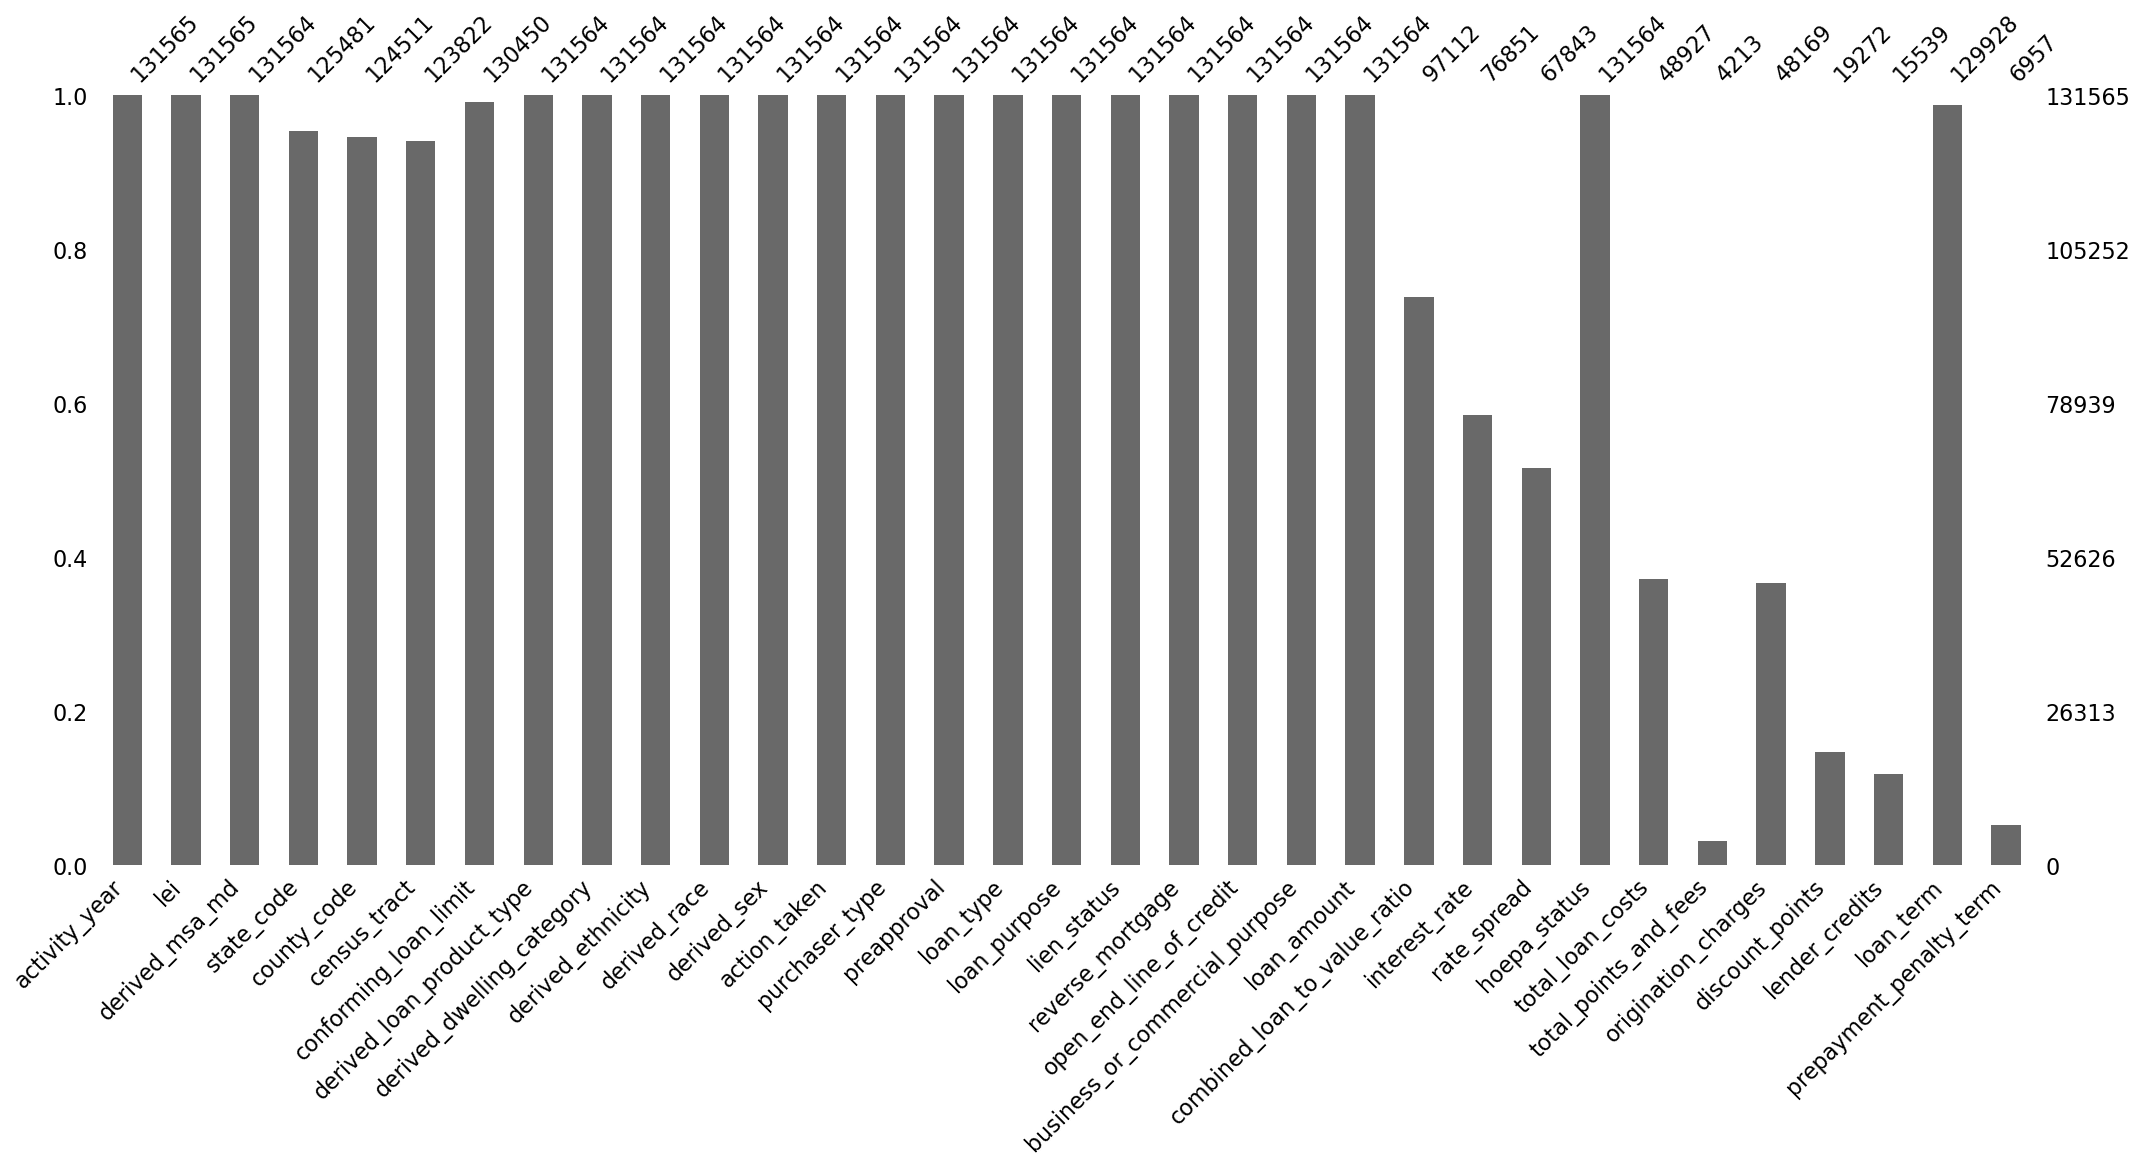

In [8]:
msno.bar(df[first_group])

<Axes: >

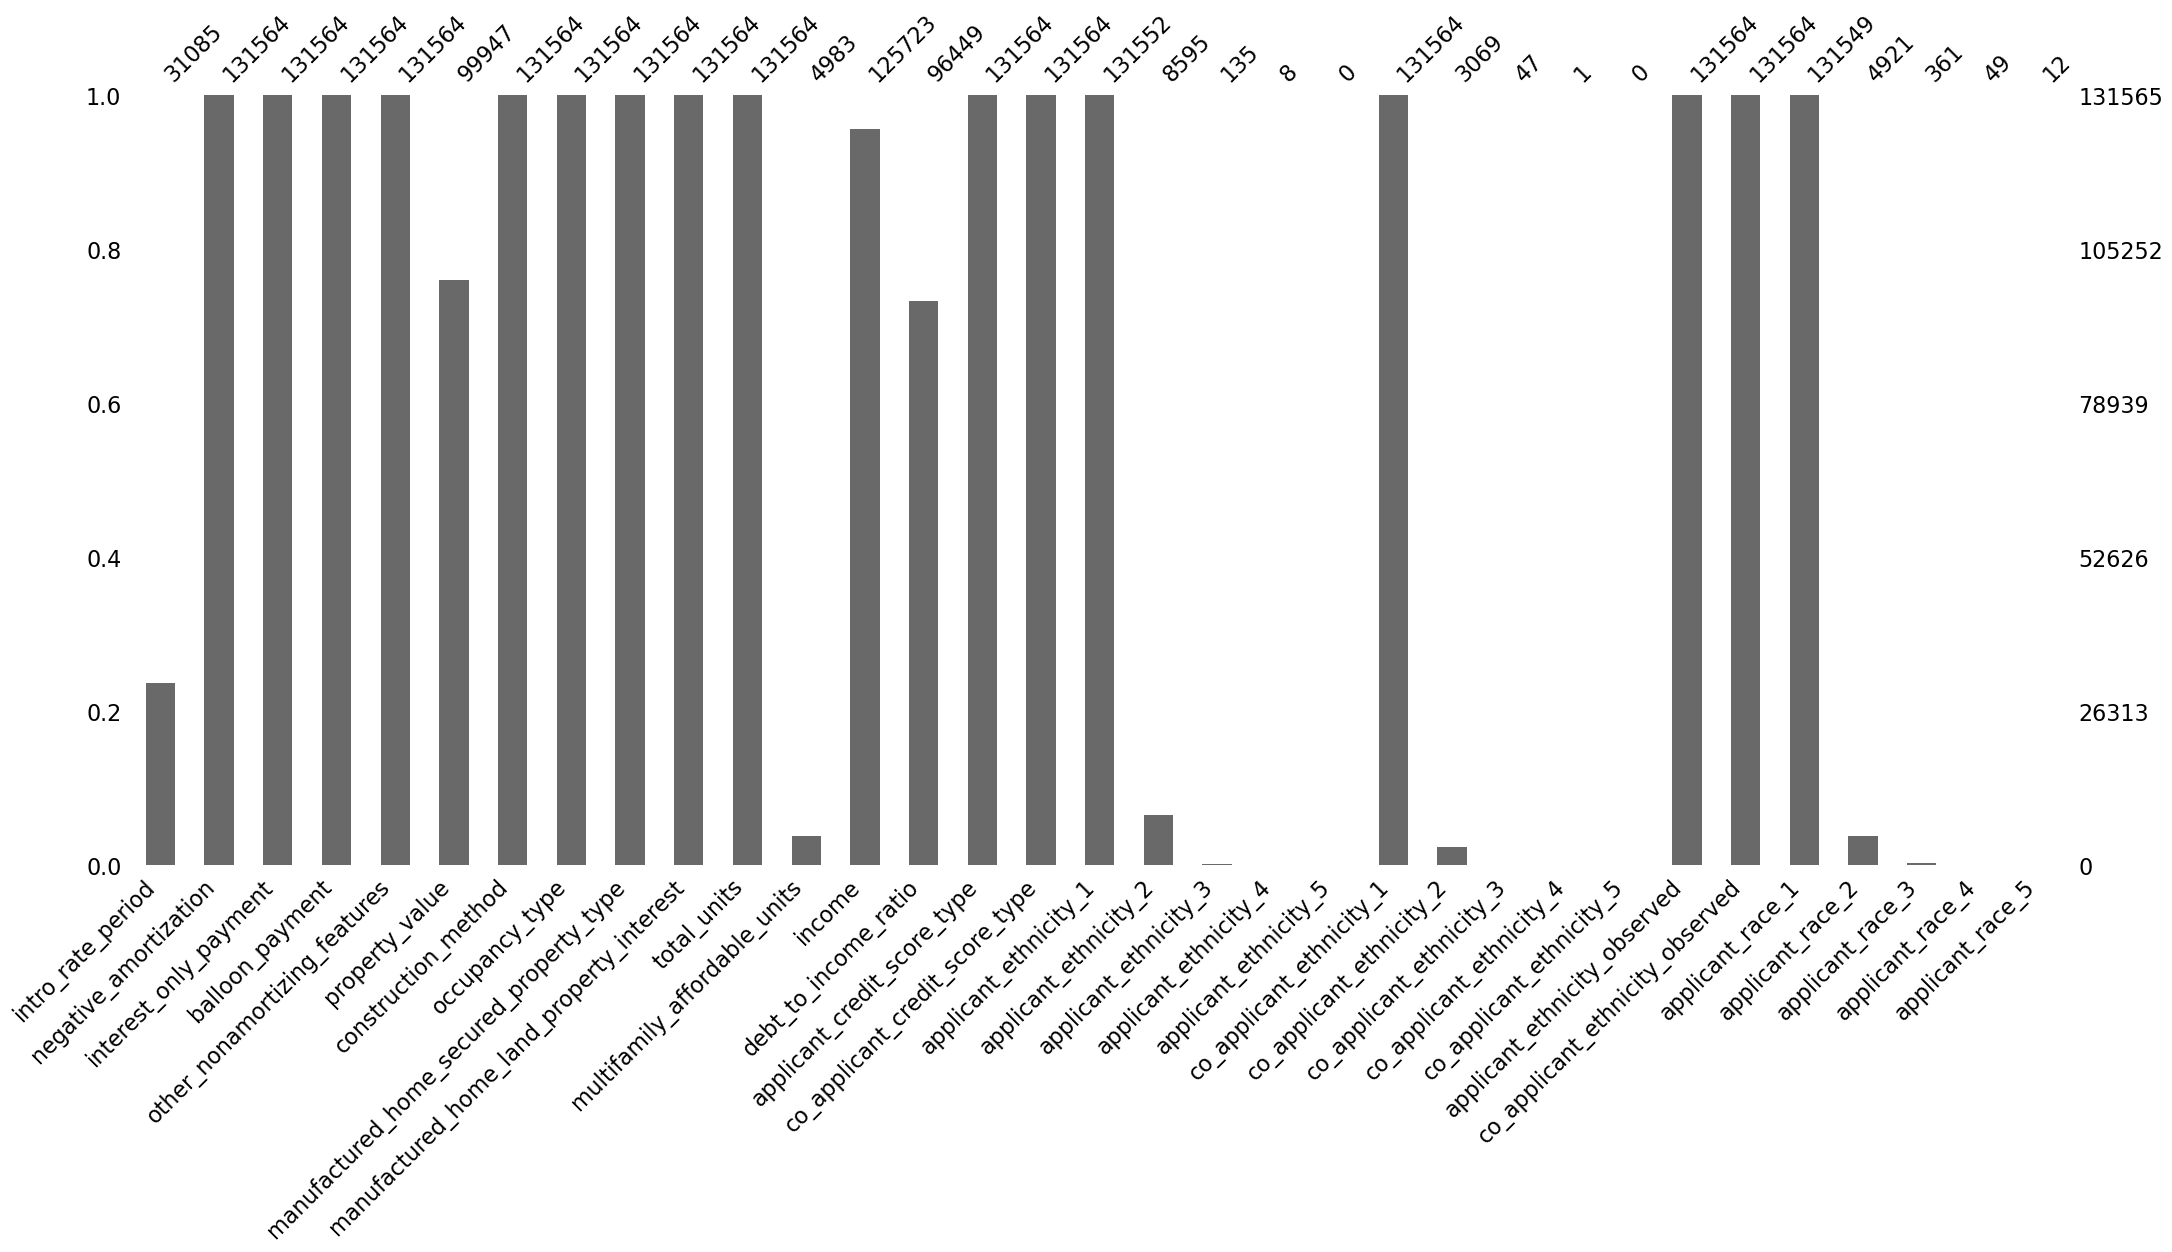

In [9]:
msno.bar(df[middle_group])

<Axes: >

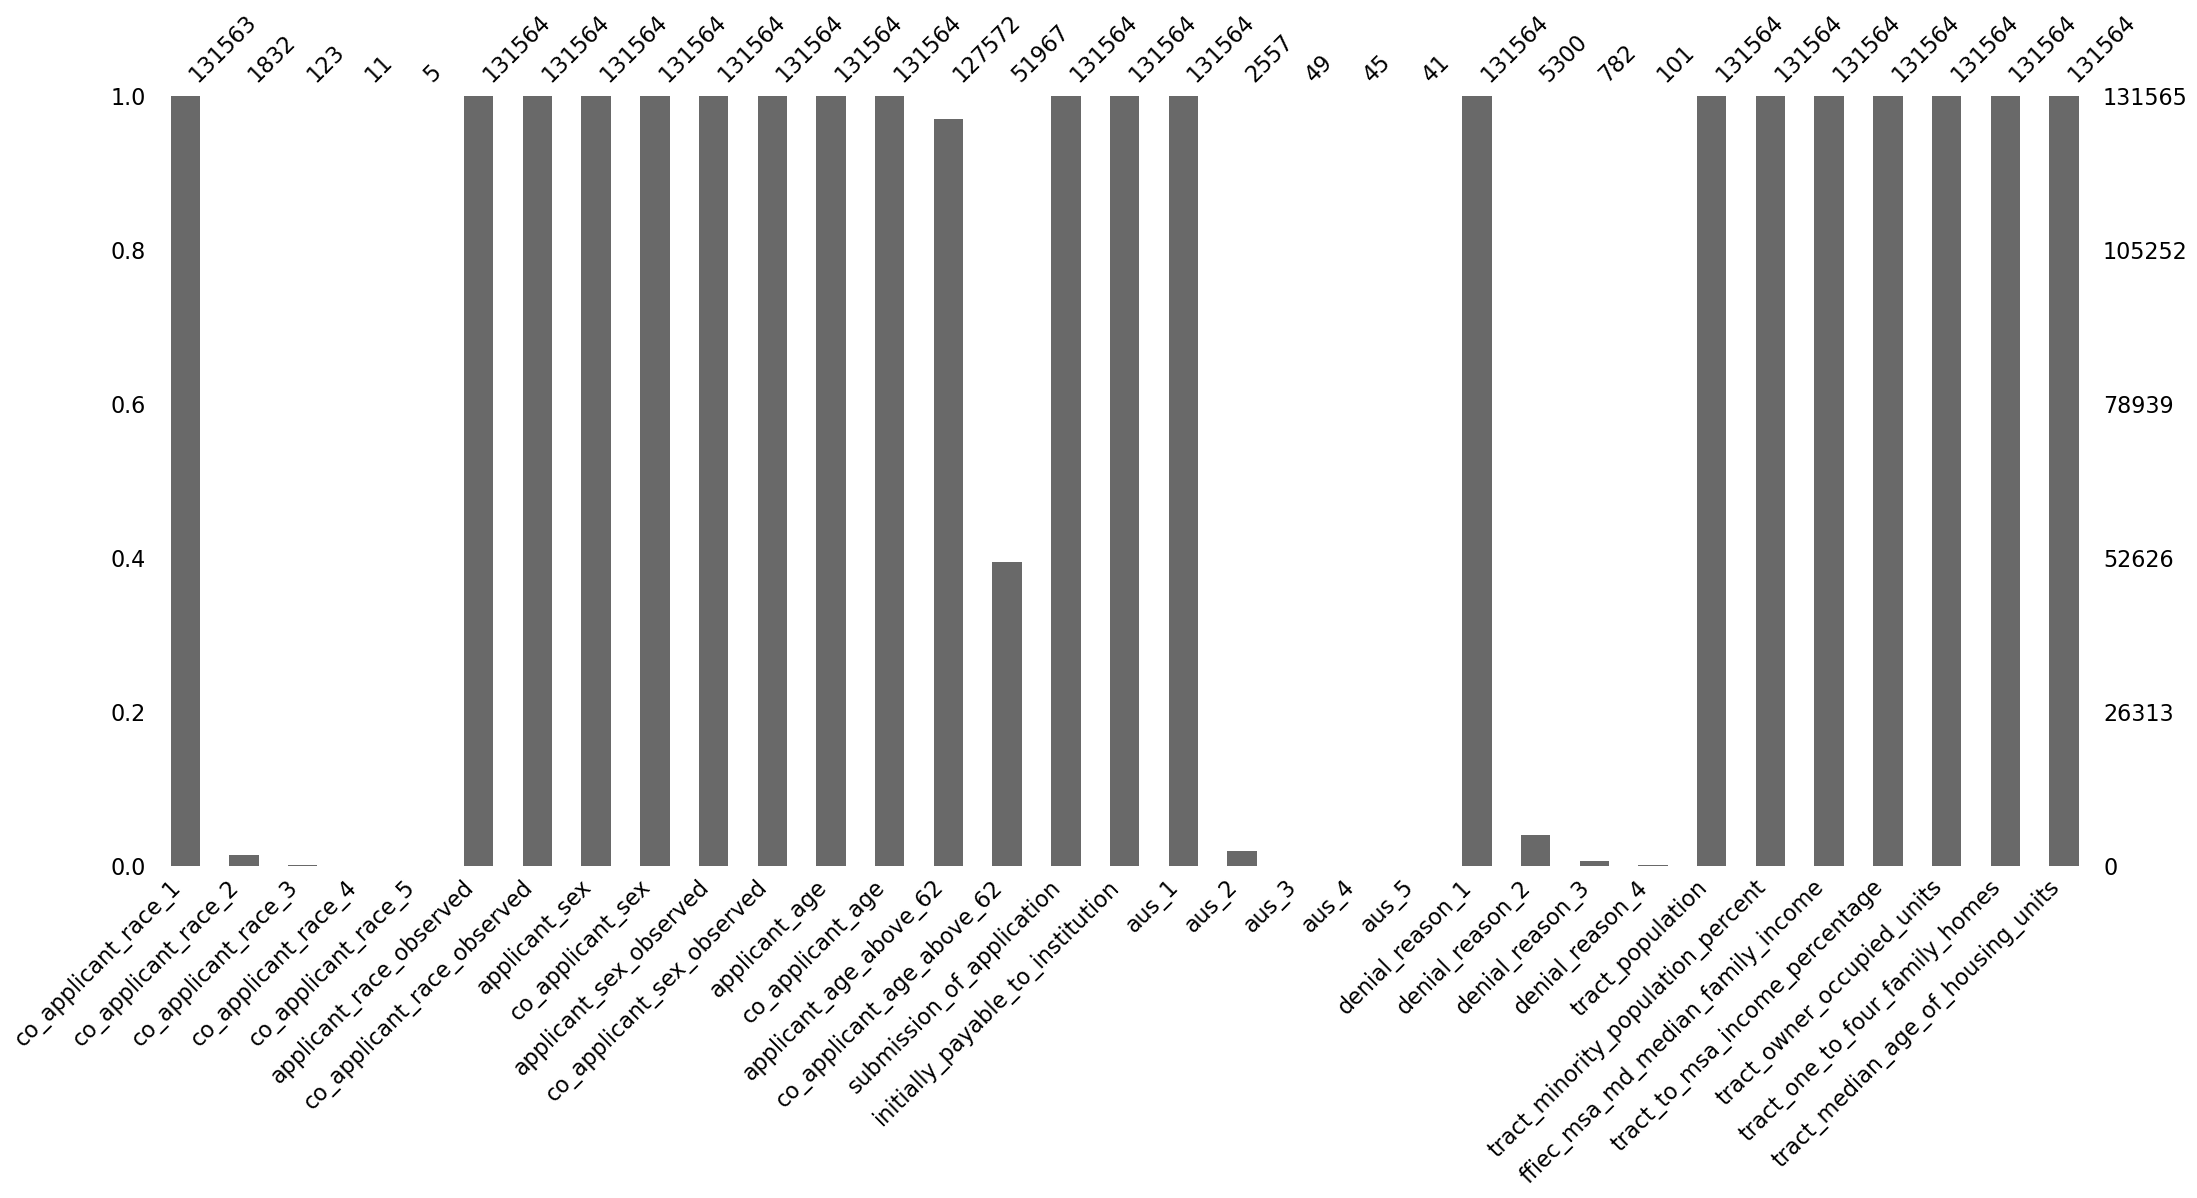

In [10]:
msno.bar(df[last_group])

Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)


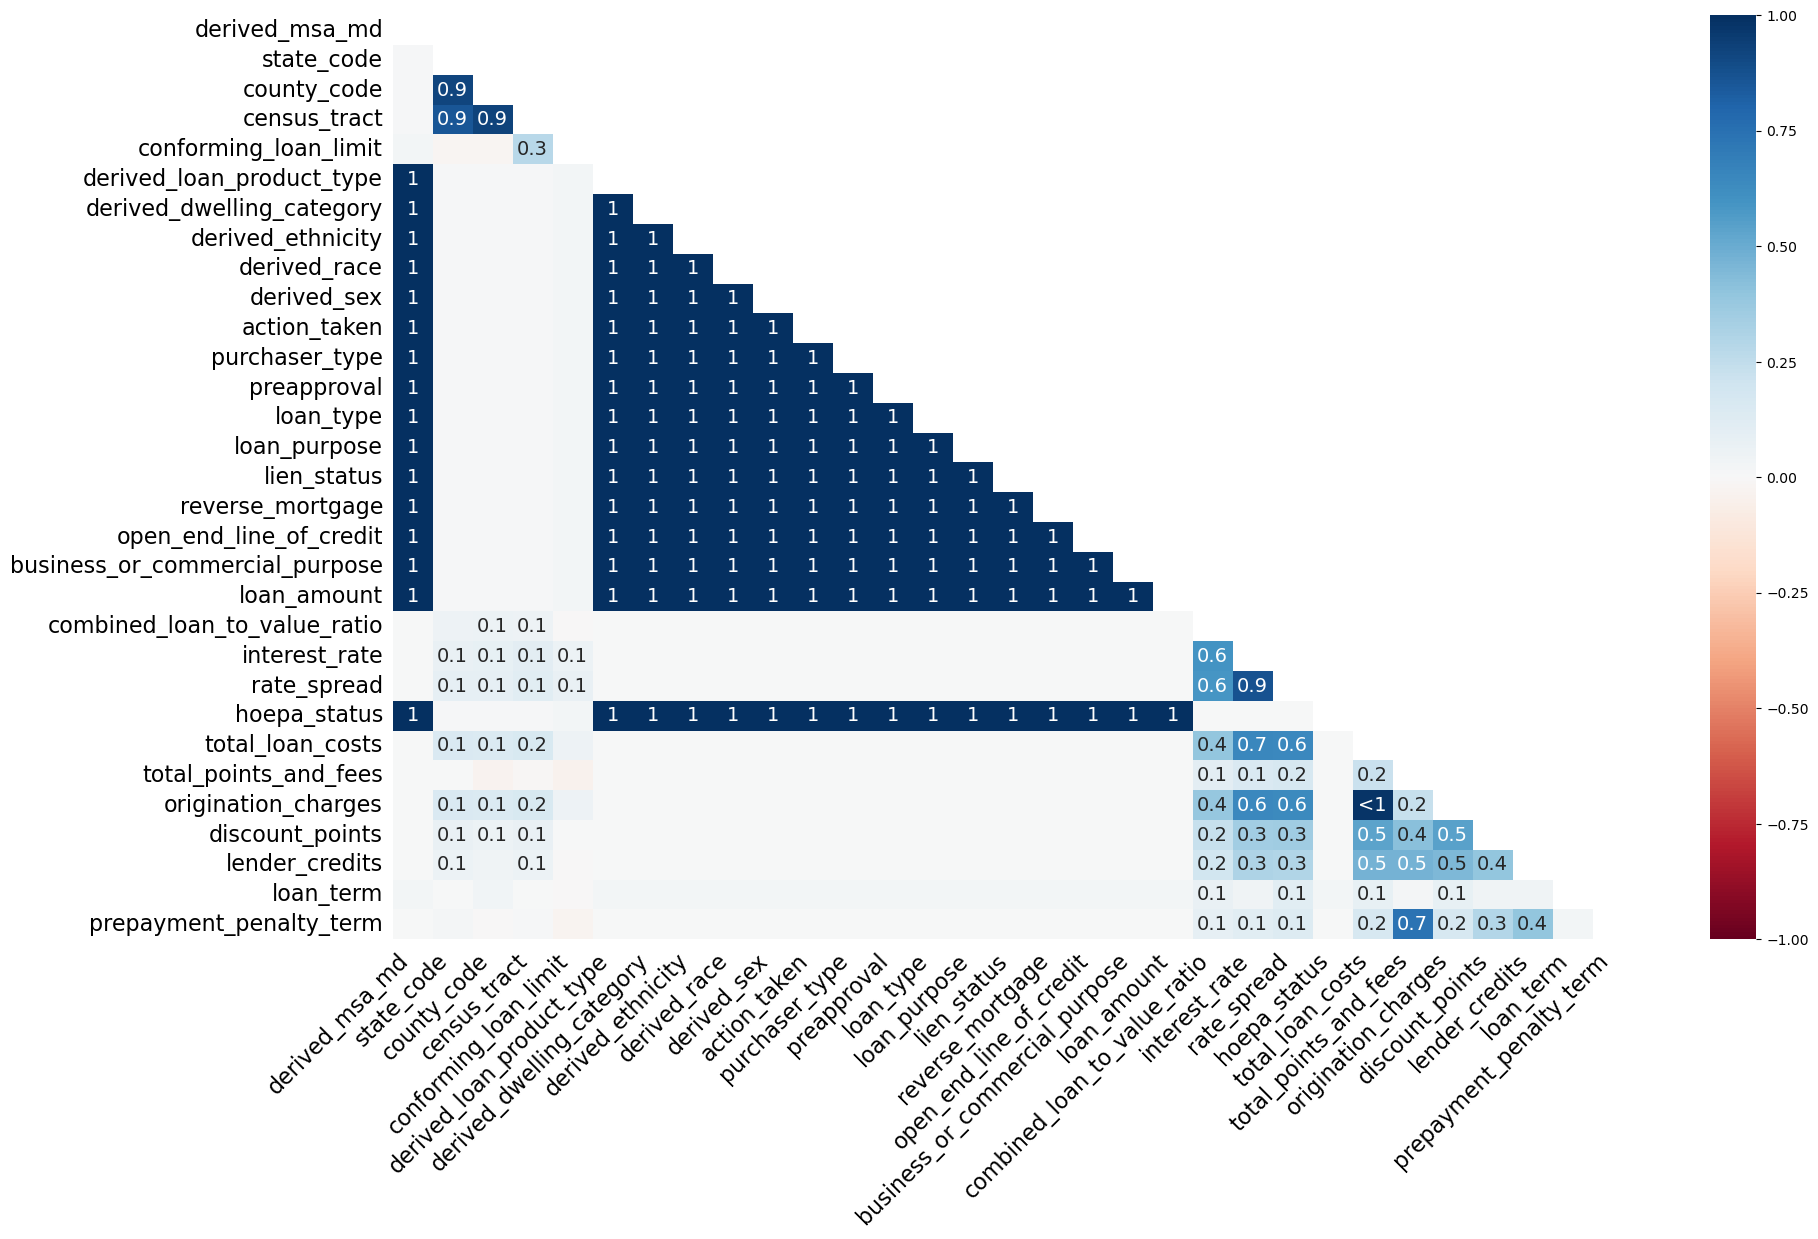

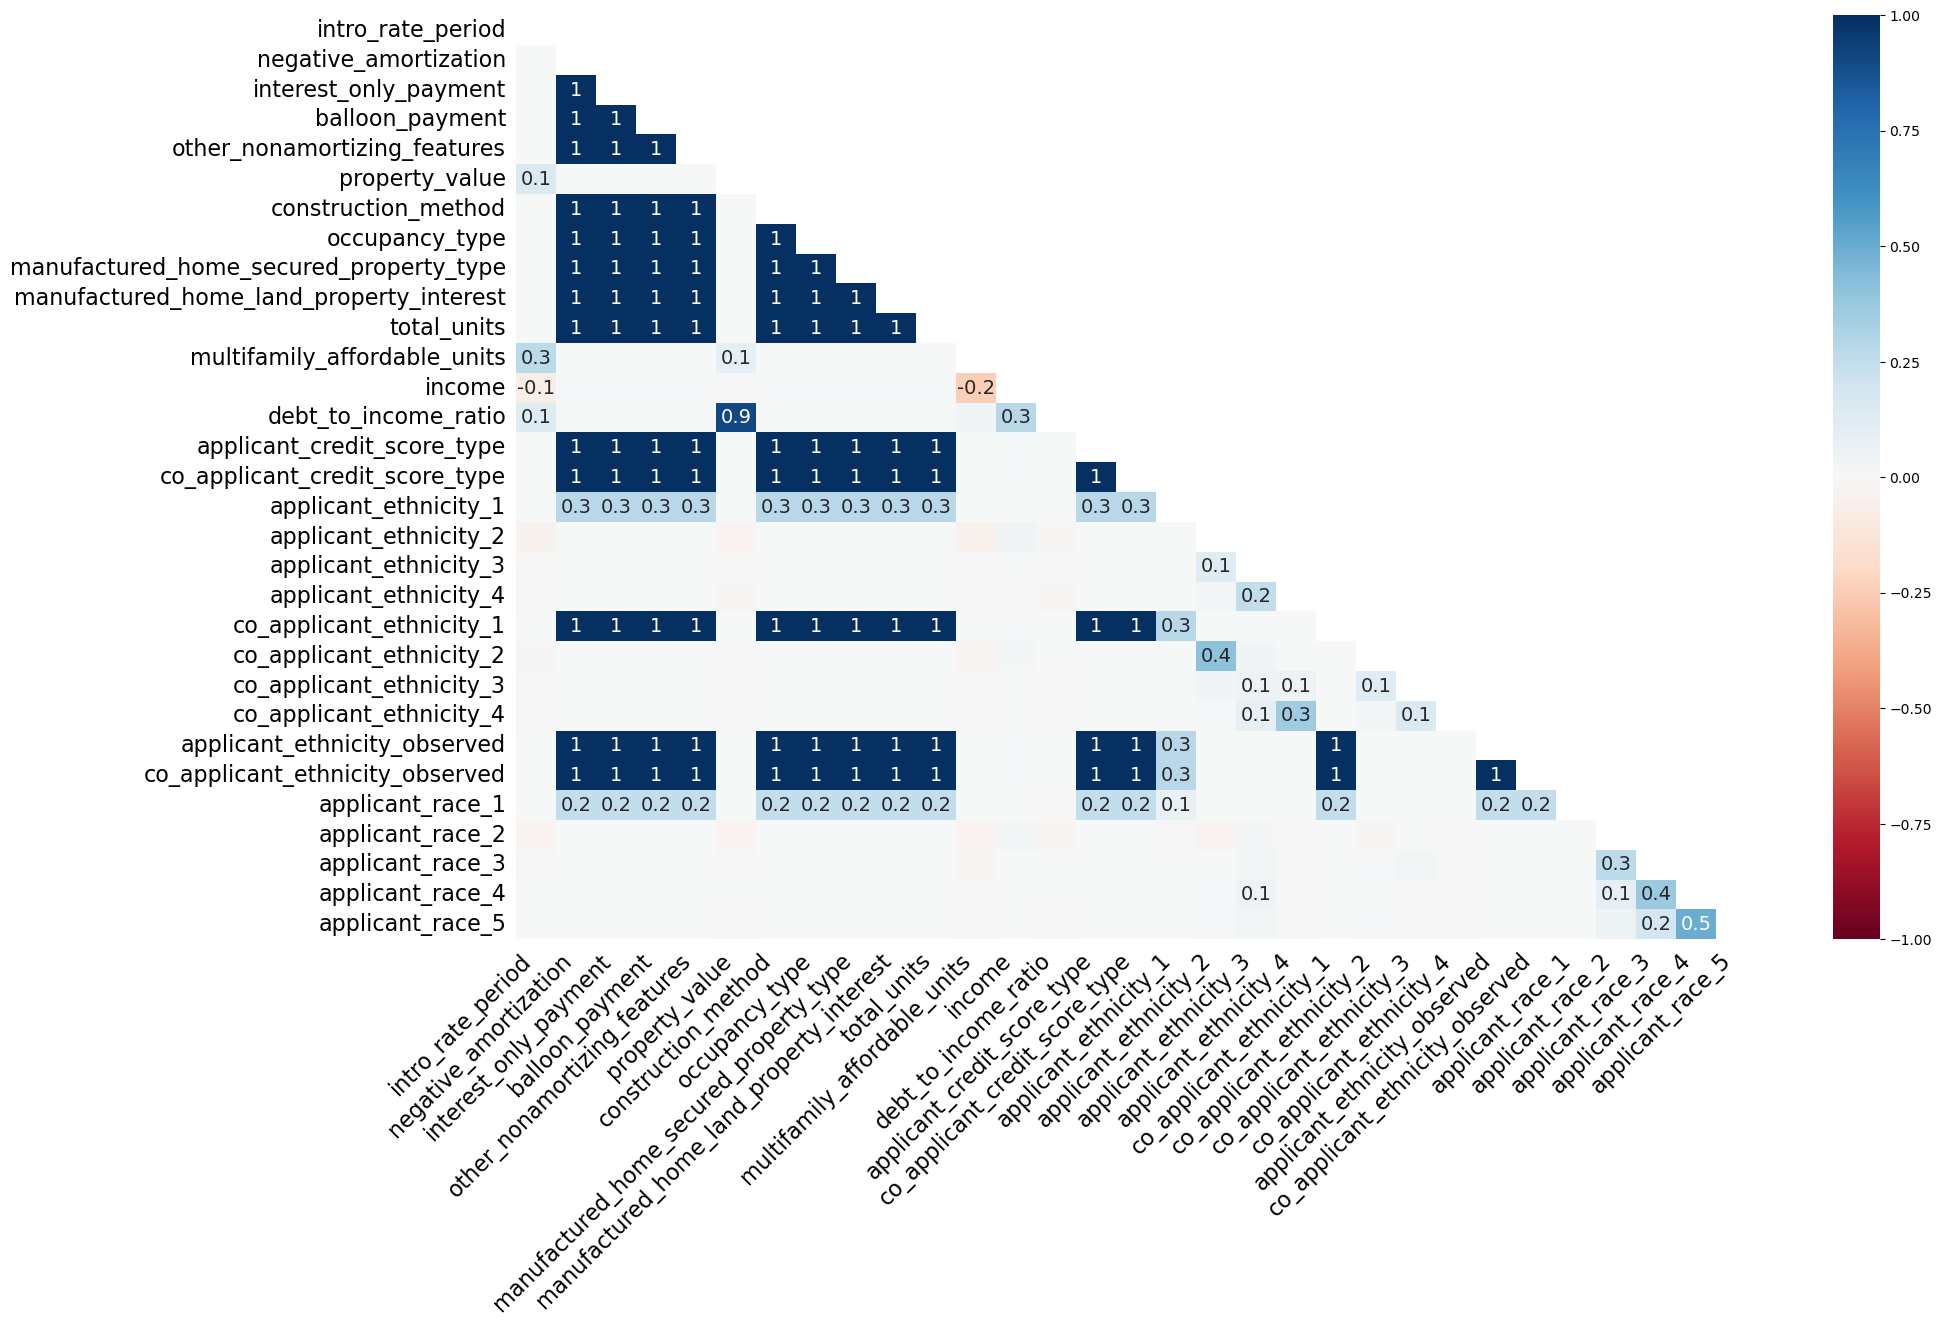

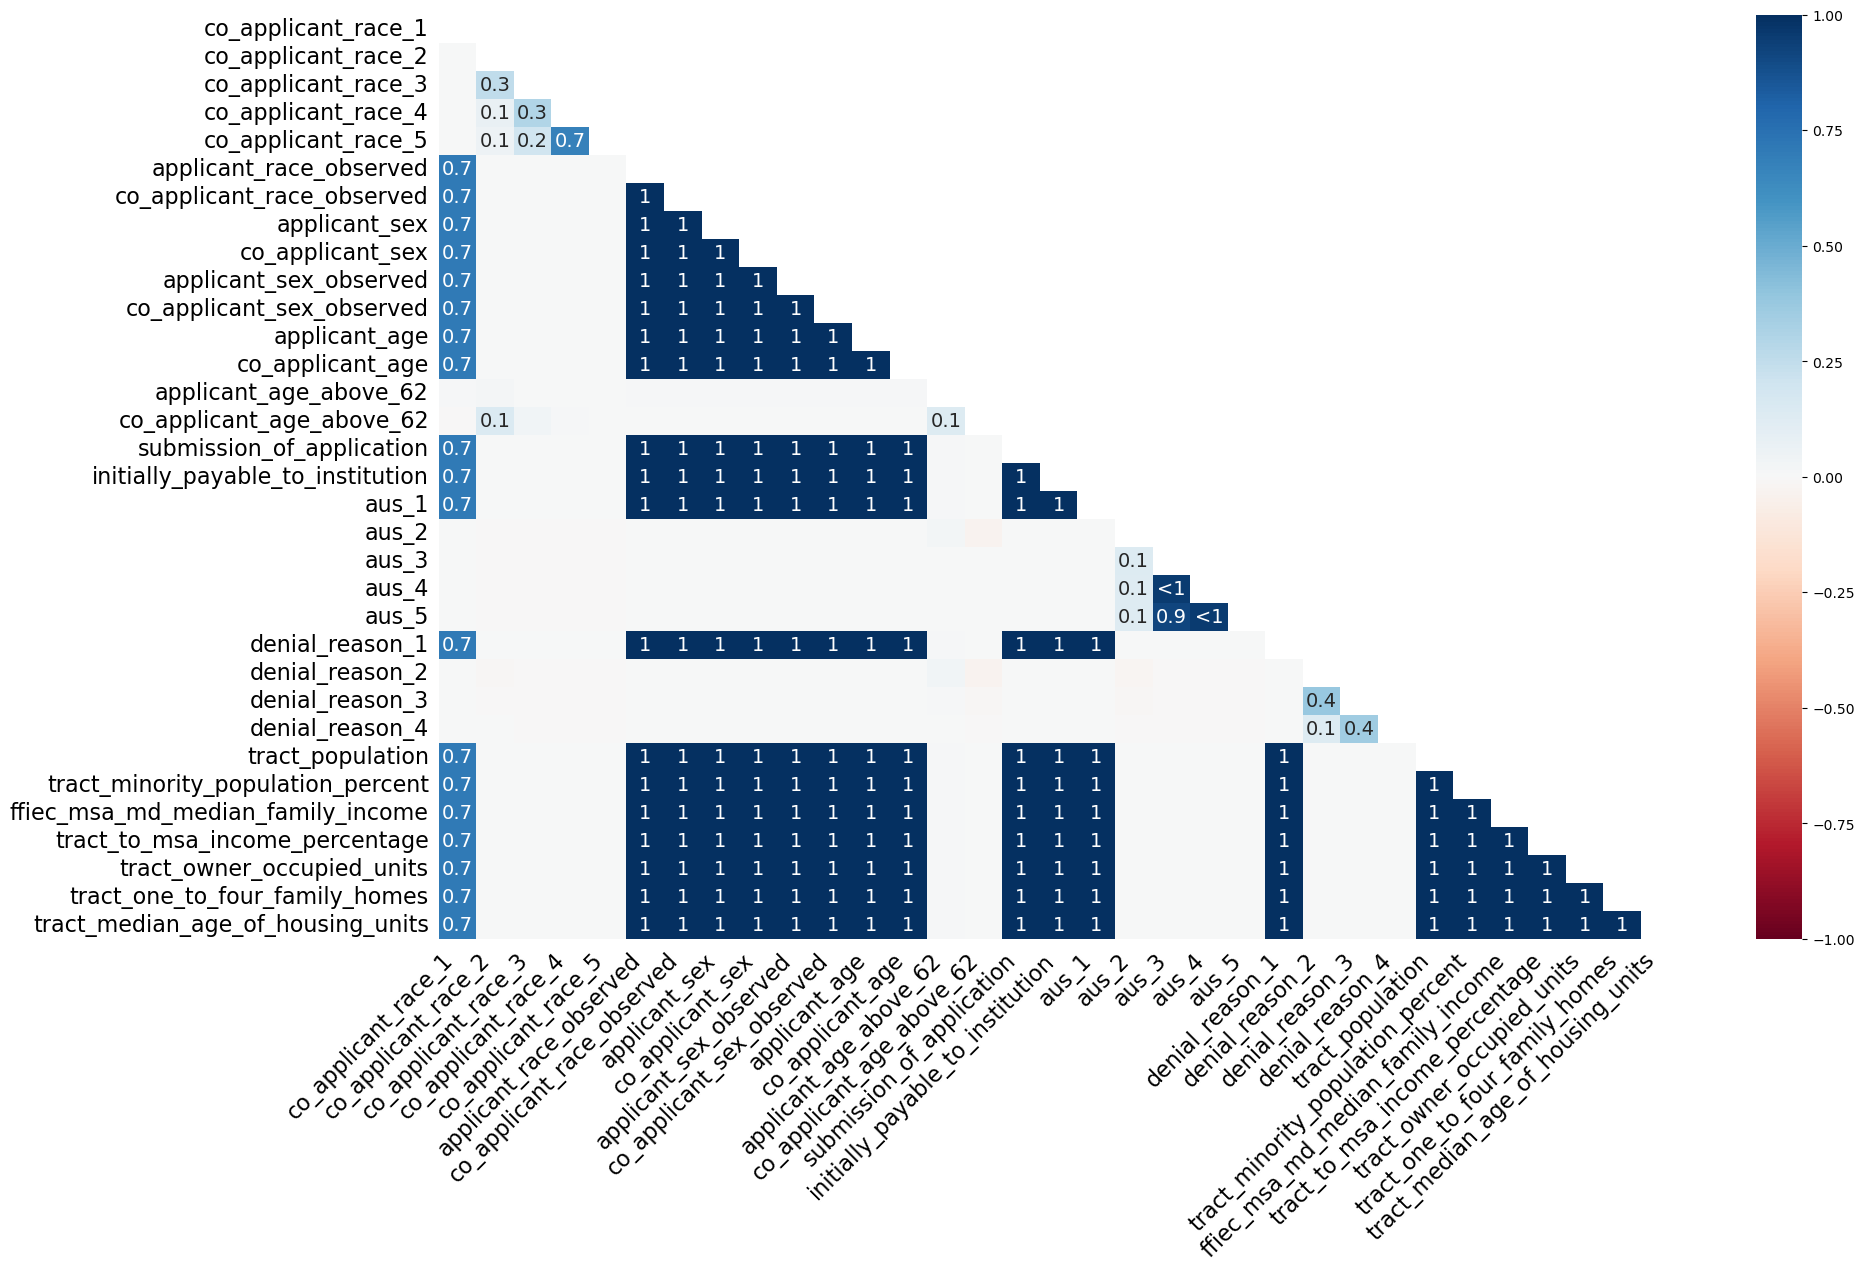

In [11]:
print(msno.heatmap(df[first_group]))
print(msno.heatmap(df[middle_group]))
print(msno.heatmap(df[last_group]))

In [12]:
df.columns

Index(['activity_year', 'lei', 'derived_msa_md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open_end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'combined_loan_to_value_ratio', 'interest_rate',
       'rate_spread', 'hoepa_status', 'total_loan_costs',
       'total_points_and_fees', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_in

In [13]:
df.describe()

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,131565.0,131564.000000,124511.000000,1.238220e+05,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,...,5300.000000,782.000000,101.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000
mean,2023.0,42167.989754,30440.602742,3.045978e+10,2.385402,5.188623,1.934739,1.275607,13.776170,1.338360,...,3.839057,5.613811,7.257426,4452.631921,34.594831,94409.333860,99.227126,1140.448177,1550.060039,36.633418
std,0.0,27022.839692,17092.915335,1.710513e+10,1.684337,17.171636,0.246987,0.562210,14.727251,0.473153,...,2.713456,2.596997,1.937284,2179.445665,28.421358,29960.098921,43.297764,599.094554,747.553444,20.143288
min,2023.0,10180.000000,1001.000000,1.001020e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2023.0,24340.000000,12133.000000,1.213397e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,7.000000,3225.000000,12.210000,84100.000000,77.300000,756.000000,1118.000000,23.000000
50%,2023.0,35154.000000,34009.000000,3.400902e+10,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,...,3.000000,6.000000,7.000000,4364.000000,25.260000,97300.000000,99.100000,1111.000000,1535.000000,38.000000
75%,2023.0,42220.000000,42101.000000,4.210103e+10,4.000000,0.000000,2.000000,1.000000,32.000000,2.000000,...,6.000000,7.000000,9.000000,5659.000000,51.490000,108500.000000,123.030000,1514.000000,1988.000000,51.000000
max,2023.0,99999.000000,78030.000000,7.803096e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,9.000000,9.000000,30199.000000,100.000000,185400.000000,516.200000,6276.000000,8233.000000,80.000000


## Predictive Analysis:

In [14]:
df[['denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'denial_reason_4']]

,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4
0,10.0,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN
2,10.0,NaN,NaN,NaN
3,10.0,NaN,NaN,NaN
4,10.0,NaN,NaN,NaN
...,...,...,...,...
131560,10.0,NaN,NaN,NaN
131561,10.0,NaN,NaN,NaN
131562,10.0,NaN,NaN,NaN
131563,10.0,NaN,NaN,NaN


In [ ]:
df.loc[
    ((df.denial_reason_1 != 10) &
    (~df.denial_reason_1.isna())) &
    (
        (df.denial_reason_2.isna()) &
        (df.denial_reason_3.isna()) &
        (df.denial_reason_4.isna())
    )
] 

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,got_loan
1,2023,549300WN576XI5QFH005,99999.0,TX,48349.0,4.834997e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,4388.0,48.63,73200.0,69.53,972.0,1711.0,48.0,True
7,2023,549300WN576XI5QFH005,41700.0,TX,48029.0,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,5691.0,85.64,89100.0,89.39,1103.0,1465.0,34.0,True
9,2023,549300WN576XI5QFH005,19124.0,TX,48113.0,4.811302e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,5688.0,85.74,105600.0,108.89,1674.0,1992.0,35.0,True
10,2023,549300WN576XI5QFH005,23104.0,TX,48439.0,4.843911e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,5831.0,80.19,97600.0,107.26,1856.0,1998.0,18.0,True
11,2023,549300WN576XI5QFH005,19124.0,TX,48397.0,4.839704e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,4755.0,18.59,105600.0,211.52,1607.0,1655.0,19.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131538,2023,254900NTAC4H10MGSU23,99999.0,NaN,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0,0.0,True
131539,2023,254900NTAC4H10MGSU23,99999.0,NaN,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0,0.0,True
131544,2023,254900NTAC4H10MGSU23,99999.0,NaN,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0,0.0,True
131546,2023,254900NTAC4H10MGSU23,99999.0,NaN,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0,0.0,True


## Model Explanation:

## Literature Review:

## Results and Conclusion: